# CS-UY 3943 - Introduction of Data Science
## Week 12: Dimensionality Reduction

Please edit the cell below to add your name, NetID, assigned group, and group members for this assignment. **Complete this section before proceeding to the assignment questions.**

Name: Lenny Remache 
NetID: ljr381
Group (Letter):  
Group Member 1: Jimmy Pacheco
Group Member 2: Oscar Ramirez 
***

### Introduction
Segments of deoxyribonucleic acid (DNA) named *coding regions* are special because these sequences of DNA can be transcribed into messenger ribonucleic acid (RNA), also known as mRNA. mRNA is utilized to create proteins through a process called *translation*. Proteins are the molecular machines through which biological activity happens.

While a nucleic acid sequence can consist of hundreds to millions of individual nucleic acids, the process of converting nucleic acids into proteins involves smaller segments of 3 nucleotides (called *codons*). Each codon corresponds to a part of a protein. The 4 nucleic acids in RNA are adenine (A), guanine (G), uracil (U), and cytosine (C). Each of the 3 nucleotides in a codon can be populated by one of these 4 nucleotides, therefore, there are 64 possible codon sequences.

The nucleic acid composition of an organism determines which biological activity that organism is capable of performing. One way to understand biological capacity of organisms is to analyze the percentage of RNA in an organism consisting of each of the 64 possible codons. The percentage of each codon present in an organism is known as "codon usage".

A number of interesting investigations could potentially be performed with this data. It might be interesting to cluster species of organisms by their genome length (the number of DNA nucleotides that an organism contains) and the organism's codon usage. Alternatively, it might be useful to build a model that can classify an organism into a biological kingdom based on unlabeled data consisting of the organism's genome length and codon usage. The focus of this assignment will however be on efforts to use unsupervised learning techniques to reduce the dimensionality (number of features) in the data.

### Data

Khomtchouk BB: 'Codon usage bias levels predict taxonomic identity and genetic composition'. bioRxiv, 2020, doi: 10.1101/2020.10.26.356295.

Nakamura Y, Gojobori T, Ikemura T: 'Codon usage tabulated from international DNA sequence databases: status for the year 2000'. Nucleic Acids Research, 2000, 28:292.

### Exercises
1\. Read the data from the **codon_usage.csv** file into your environment as a `pandas` `DataFrame`. 
* Some data rows in the input file contain extra commas in the `SpeciesName` column. Because `pandas` uses the comma (`,`) as the default column delimiter, this produces a warning when using `pd.read_csv()` to read the data from the input file. To avoid problems due to these rows of data being included in the analysis, identify these rows and remove them from the `DataFrame`.
    * Convert any codon usage columns that are represented as an object (`dtype` is `O`) to `float`
        * Any column values that cannot be converted will represent rows containing extra commas 
        * The `dtypes` attribute of the `DataFrame` class and the `astype()` method for the `DataFrame`/`Series` class may be helpful
* Because codon usage can differ between different types of DNA in the same organism (e.g. genomic vs organelle DNA), limit this analysis to samples with a `DNAtype` equal to `0` (genomic DNA).
* Create a plot to visualize the distribution of lengths of the genomic DNA of each organism. 
    * The `Ncodons` column can be used as a proxy for genome length.
    * If necessary (based on your choice of visualization), apply a transformation to the `Ncodons` column to improve the ability to visualize the spread of the data values. 

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("codon_usage.csv")
df.head(5)

/Users/lennyremache/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [124]:
df.dtypes[5:7]

UUU    object
UUC    object
dtype: object

In [125]:
df['UUU'] = df['UUU'].astype(str)
df['UUC'] = df['UUC'].astype(str)

for i in range(len(df['UUU'])):
    try:
        df.at[i,'UUU'] = float(df['UUU'][i])
    except:
        df.at[i,'UUU'] = float('NaN')

for i in range(len(df['UUC'])):
    try:
        df.at[i,'UUC'] = float(df['UUC'][i])
    except:
        df.at[i, 'UUC'] = float('NaN')
        
df.dropna(axis=0, inplace=True)

In [126]:
df['UUU'] = df['UUU'].astype(float)
df['UUC'] = df['UUC'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13026 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13026 non-null  object 
 1   DNAtype      13026 non-null  int64  
 2   SpeciesID    13026 non-null  int64  
 3   Ncodons      13026 non-null  int64  
 4   SpeciesName  13026 non-null  object 
 5   UUU          13026 non-null  float64
 6   UUC          13026 non-null  float64
 7   UUA          13026 non-null  float64
 8   UUG          13026 non-null  float64
 9   CUU          13026 non-null  float64
 10  CUC          13026 non-null  float64
 11  CUA          13026 non-null  float64
 12  CUG          13026 non-null  float64
 13  AUU          13026 non-null  float64
 14  AUC          13026 non-null  float64
 15  AUA          13026 non-null  float64
 16  AUG          13026 non-null  float64
 17  GUU          13026 non-null  float64
 18  GUC          13026 non-null  float64
 19  GUA 

In [127]:
new_df = df.loc[df['DNAtype'] == 0]
new_df

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13017,pri,0,9597,41117,Pan paniscus,0.02342,0.02846,0.00987,0.01527,0.01542,...,0.00795,0.01459,0.01318,0.01384,0.01824,0.02196,0.03478,0.00046,0.00092,0.00158
13019,pri,0,9598,328023,Pan troglodytes,0.01380,0.02200,0.00569,0.01047,0.01147,...,0.01214,0.01339,0.01351,0.01751,0.02667,0.02191,0.04283,0.00065,0.00060,0.00165
13021,pri,0,9600,96254,Pongo pygmaeus,0.01739,0.02236,0.00887,0.01221,0.01307,...,0.00885,0.01497,0.01232,0.01886,0.02383,0.02546,0.03319,0.00149,0.00068,0.00150
13023,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638


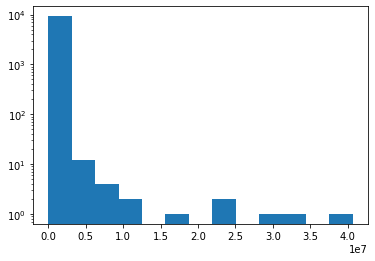

In [128]:
_ = plt.hist(new_df['Ncodons'], log=True, bins=13)

plt.show()

2\. Consider the goal of wanting to cluster organisms based on their genome length and codon usage pattern. To accomplish this goal, it is beneficial to ensure that certain features do not unduly influence the clustering effort. Therefore, we would like all features to be expressed on the same scale and also reduce the number of dimensions of the dataset by eliminating uninformative/redundant features.  

1. Create a version of the `DataFrame` without any of the categorical columns included
    1. Do not drop the columns as the `Kingdom` will be needed for a later problem
1. Transform the `Ncodons` column so that it is represented on the same scale as the codon usage percentages. 
    1. Codon usage percentages are in the range 0 to 1 and the `Ncodons` column should be transformed to have values in this range that still retains the relative value between entries in the column
    1. Ensure that the original `Ncodons` column is no longer in the `DataFrame` after scaling the values
    1. The scaled `Ncodons` column will not be included in the correlation calculation below but will be used in question 3.
1. Calculate the correlation coefficients between the codon usage percentages to determine the amount of redundancy in the dataset.
    1. Visualize this redundancy using a heat map visualization that can help distinguish highly correlated values from relatively uncorrelated values.
    1. `Seaborn`'s [`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function may be useful for producing this visualization.
    1. In order to see a majority of the codon values in the heat map, you may want to increase the size of the visualization by calling `plt`'s `figure()` function and setting the `figize` (e.g. `plt.figure(figsize=(PLOT_LENGTH, PLOT_WIDTH))`)
        
What does the heat map reveal about the the redundancy of the codon usage percentages? Is there an opportunity to eliminate or combine codons when clustering the data based on codon usage?

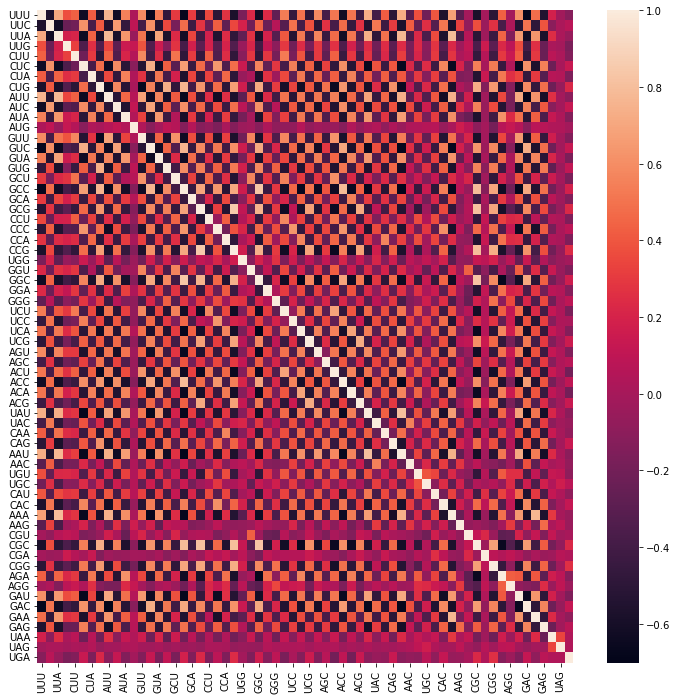

In [146]:
import seaborn as sns

non_cat_df = new_df.drop(['Kingdom','DNAtype','Ncodons','SpeciesID','SpeciesName'], axis = 1)

transformed_ncodons = (new_df['Ncodons'] - new_df['Ncodons'].min()) / (new_df['Ncodons'].max() - new_df['Ncodons'].min())

_ = plt.figure(figsize=(12,12))
_ = sns.heatmap(non_cat_df.corr())

plt.show()


<p>
<span style="color:blue">
Dark spots show highly correlated codon correlation values meaning they represent the same information, which is redundant. Here there would be an opportunity to eliminate or combine codons when clustering the data based on codon usage.
</span>
</p>

3\. Is there reason to believe that the biological kingdom can be distingushed based on the number of codons and codon usage patterns for an unlabeled organism? 

Principal Component Analysis (PCA) can be used to represent the raw data in a lower number of dimensions that better explain the variance in the data. To help answer this question, complete the following:
* Decompose the normalized codon counts and the codon percentages into the components that explain the most variance in the data using PCA
    * Create a bar plot of the components generated by PCA to determine how many components to retain using ~0.00015 as the significance threshold for variance
* Map each of the 7 kingdom values to an integer
    * Create a sequence (`list`/`array`/`series`) which is the same length as the `Kingdom` column of your `DataFrame` which contains integer values corresponding to the `Kingdom` value in the original data 
* Generate a scatter plot from the first 2 principal components 
    * Use the sequence of kingdom ids generated above as the `c` parameter's argument when creating the scatter plot to color points by `Kingdom` membership
    * Set `alpha=0.1` when creating the scatter plot
    * Increasing the figure size with `plt.figure()` may improve the separation between kingdoms in the plot
* Generate a 3D scatter plot using the first 3 principal components
    * Add the ability to include a 3rd dimension on your plot by executing the following line of code `ax = plt.axes(projection='3d')`
    * Create a 3d scatter plot by calling the `.scatter3D` method of the axes object as follows:
    
    `ax.scatter3D(pc1, pc2, pc3, alpha=0.1, c=ids)`  
    
    where `pc1`, `pc2`, and `pc3` are the first 3 principle component values for the samples and `ids` is the sequence containing the integer representation of the kingdom for each sample
    
    
Does the addition of the 3rd principal component to the visualization change your response regarding the ability to distinguish the biological kingdom based on codon usage and the number of codons?

In [ ]:
from sklearn.decomposition import PCA

# Place your code here

<p>
<span style="color:blue">
Add your response to the question regarding biological kingdom distinguishability here
</span>
</p>

4\. Use the retained principal component representation of the data to build a classifier for kingdom identification for an organism. While we have not covered classification problems beyond the binary (2 class) scenario, expanding models to problems with more than 2 classes is natively supported in a number of learning models in scikit-learn. For this exercise, a logistic regression model will be used. Follow these steps to build such a classifier:
1. Split the data (retained principal components) with 70% as training data and 30% as testing data using the function `train_test_split`. Be sure to set the `random_state` parameter to ensure reproducible results.
1. `scikit-learn` provides a logistic regression classifier with built in cross validation named `LogisticRegressionCV`. When fitting this model, a cross validation procedure will be executed to find the optimal regularization parameter ($C$) on the training data and create a classifier using this optimal value. Create a classifier (with default parameters) using `LogisticRegressionCV`. Set the `solver` parameter to `"newton-cg"` as this method works well for the data under consideration.  
1. Fit the model on the training data set. When fitting the model, time the execution of the `.fit` method using the [`%timeit` ](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit) magic command by placing it before the call to the `.fit` method.
1. Calculate the accuracy of the model on the held out (test) data set using the `.score` method

Now, complete the same steps as above (building a new classifier) but use all of the original features (not the principal components).

Reflect on the trade-off between classifier accuracy and the training time/memory used due to the dimensionality of the data. Is the increased efficiency of the training worth the loss in accuracy? If you assume that the training time scales linearly with the number of features and we had 1000 times as many features in the original data, would your answer change?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
# Place your code here

<p>
<span style="color:blue">
Write your answer here
</span>
</p>

**FYI**: Logistic regression does not scale linearly in the size of the data.